In [5]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 250
batch_size = 5
folder_name = 'ABCXO_one_sample'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  #sensor_size_to = 45,
                  sensor_size_to = 32,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(128, 128)), Downsample(time_factor=1, spatial_factor=0.25, sensor_size=None, target_size=None), ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]


In [6]:
from snn_delays.utils.model_loader_refac import ModelLoader
snn = ModelLoader('abcxo_f_980', 'abcxo_32_24_1ms_crop128_32', batch_size, 'cpu', live = True)

snn.input2spike_th = 0.5

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Instance of <class 'snn_delays.snn_refactored.SNN'> loaded successfully


In [7]:
snn.debug = True
snn.init_state_logger()
a, b = snn.test(test_loader)

5
Test Loss: 0.05324479937553406
Avg spk_count per neuron for all 250 time-steps 1569.0
Test Accuracy of the model on the test samples: 80.000



In [8]:
snn.spike_state.keys()

dict_keys(['input', 'l1', 'l2', 'output'])

In [9]:
i_spikes = snn.spike_state['input'].detach().cpu().numpy()
l1_spikes = snn.spike_state['l1'].detach().cpu().numpy()
l2_spikes = snn.spike_state['l2'].detach().cpu().numpy()
o_spikes = snn.spike_state['output'].detach().cpu().numpy()

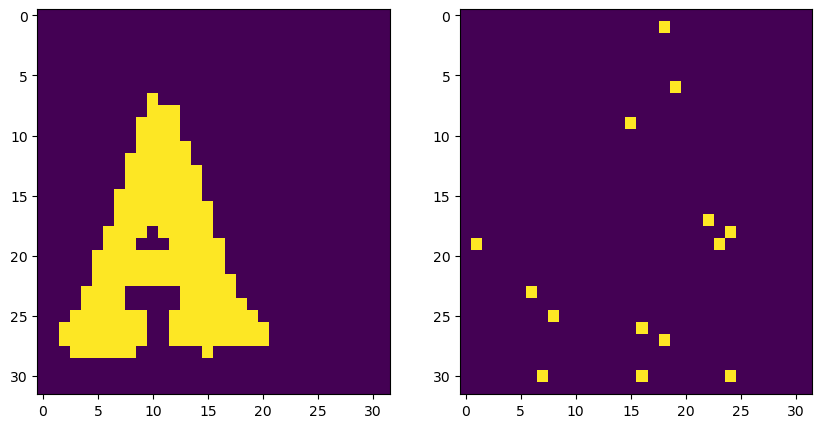

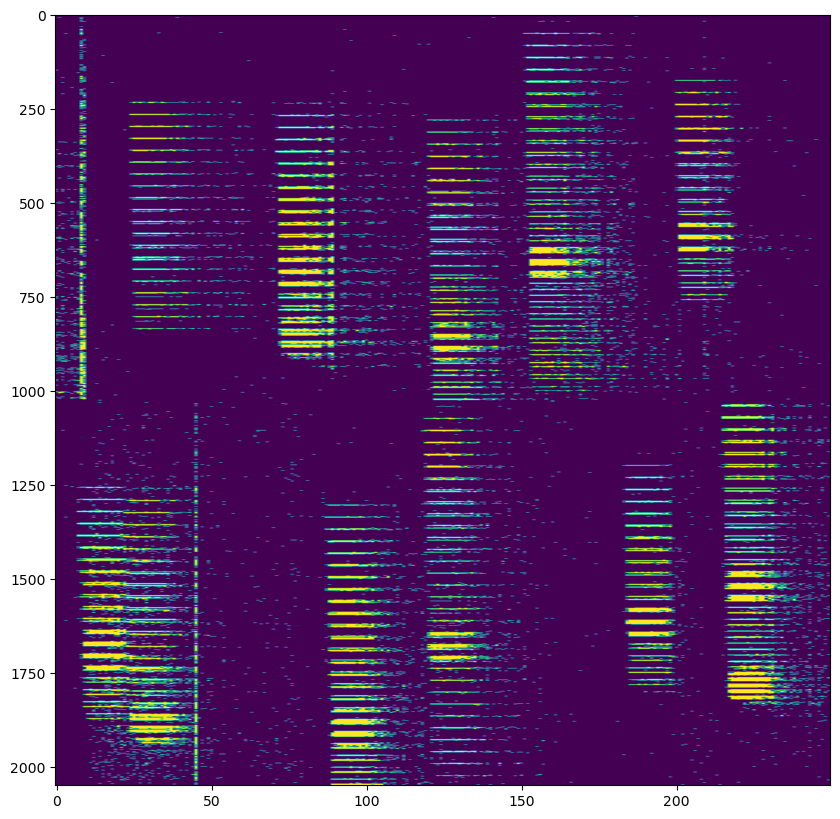

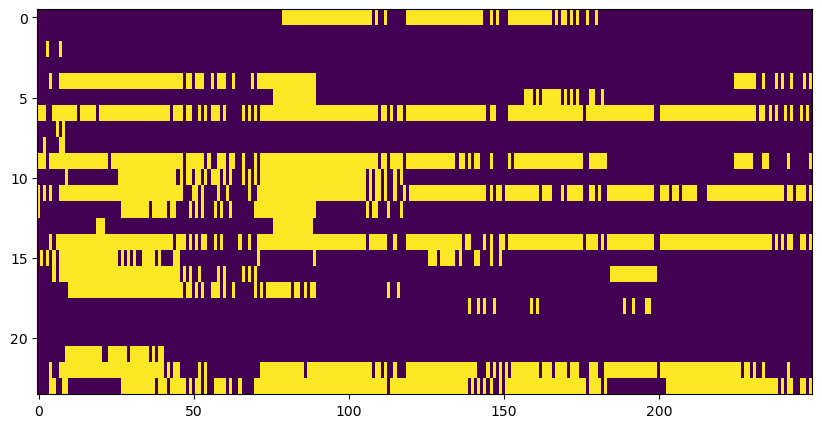

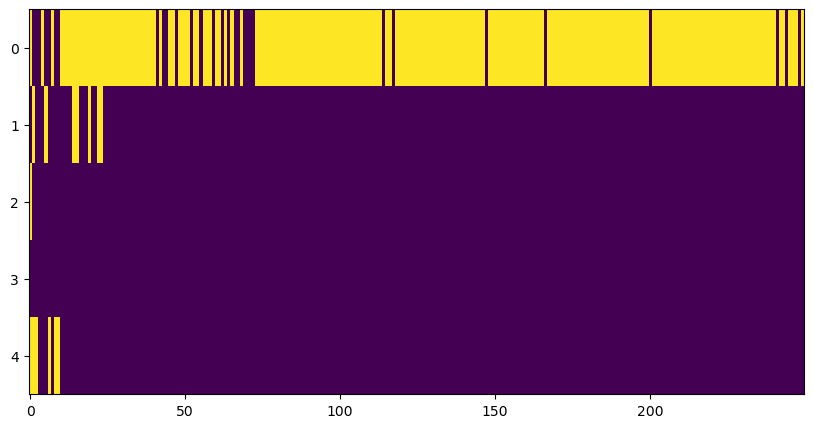

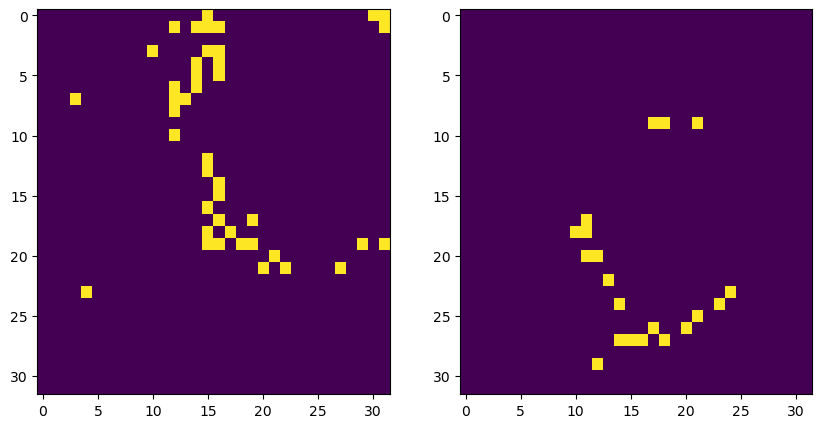

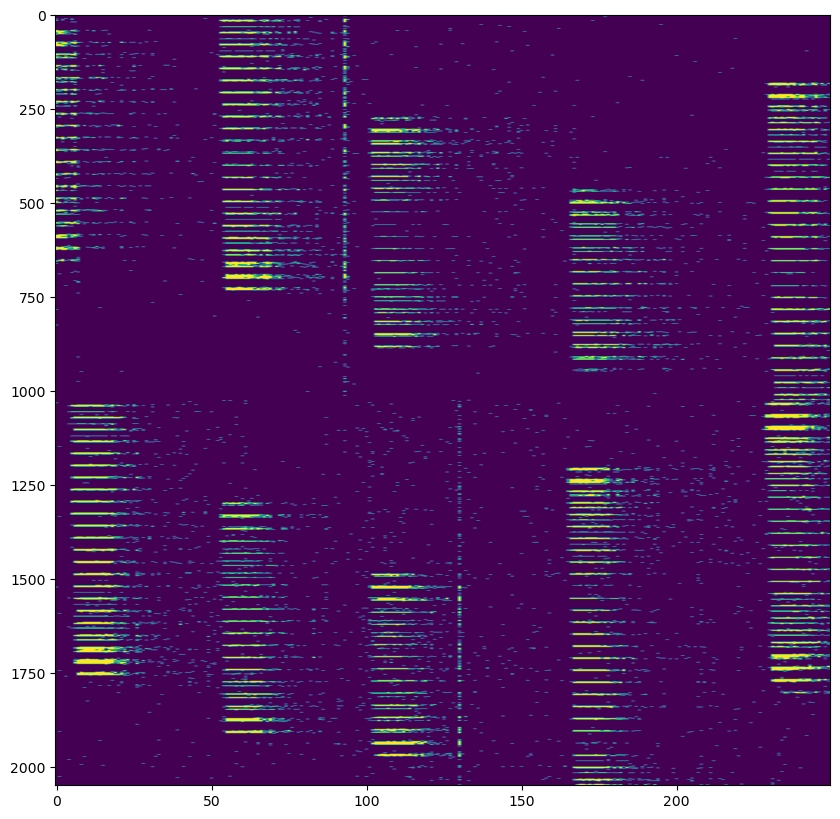

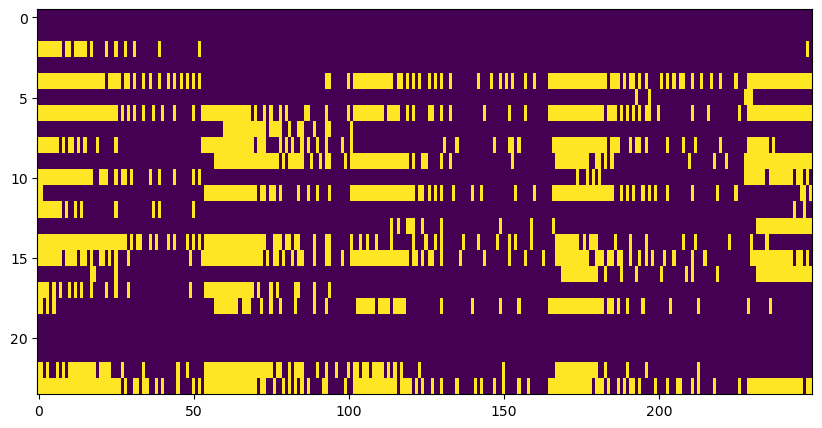

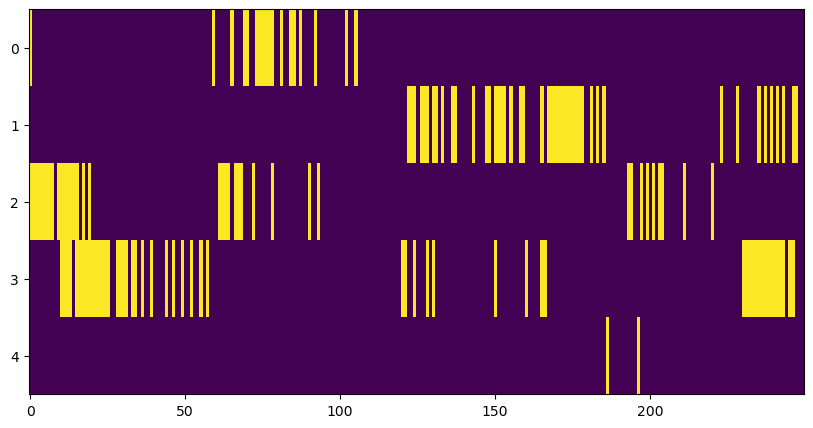

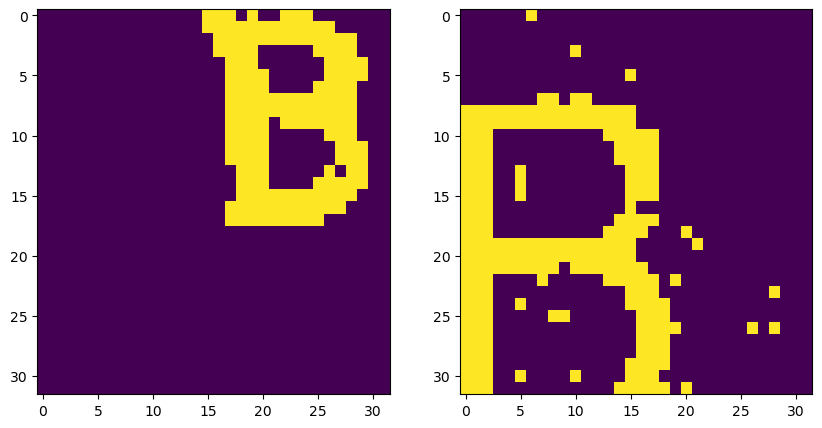

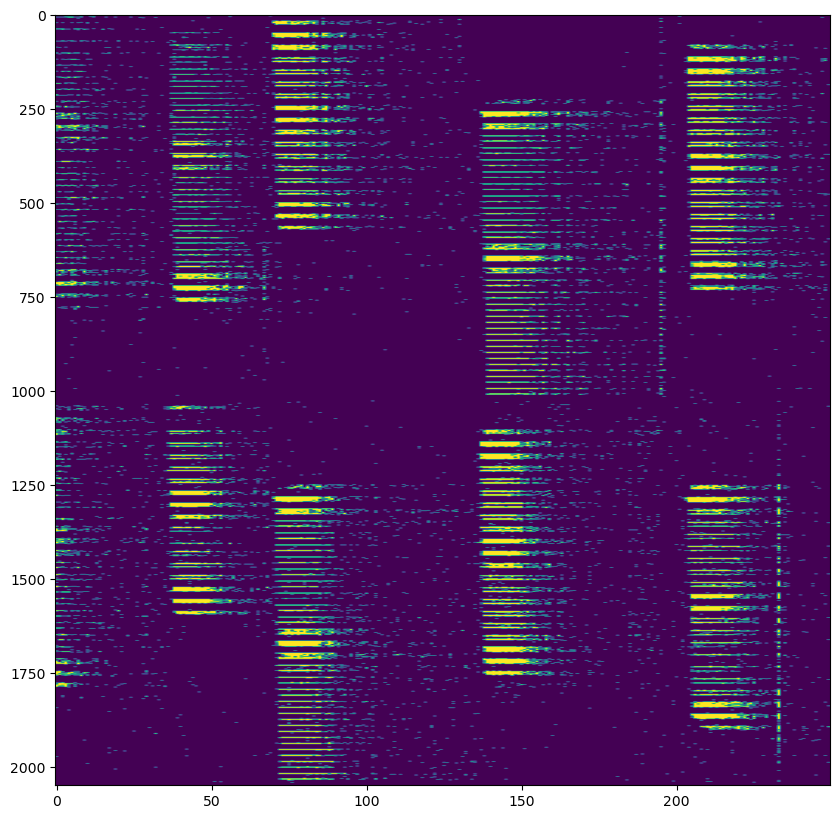

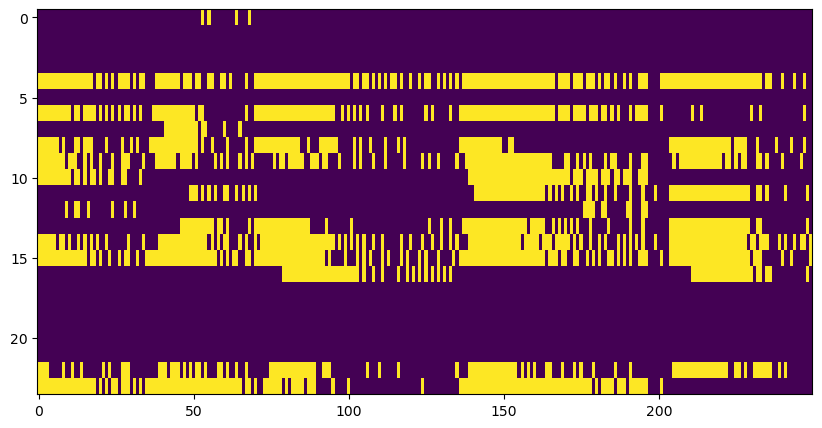

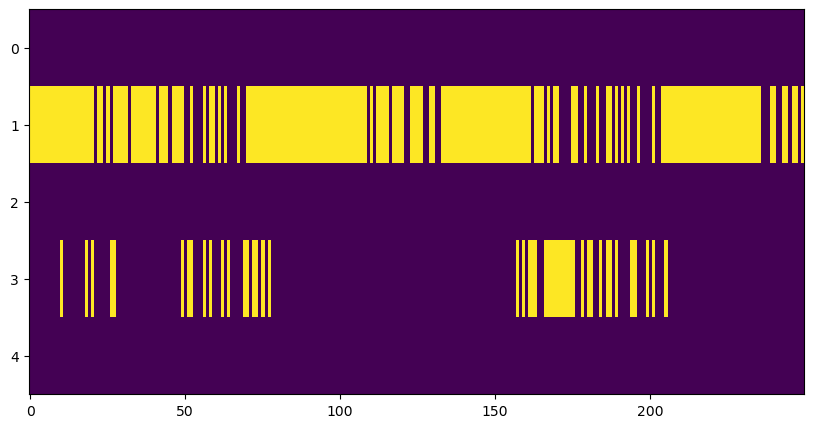

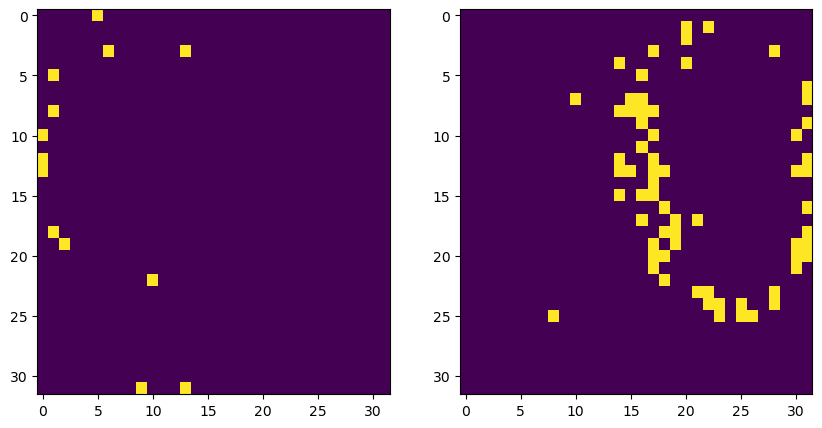

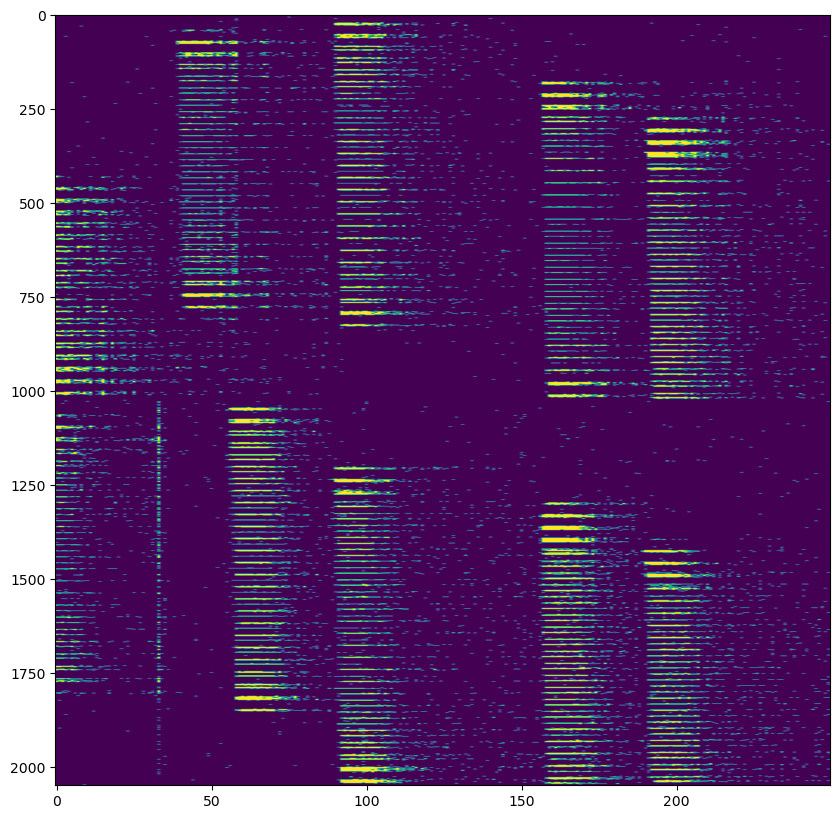

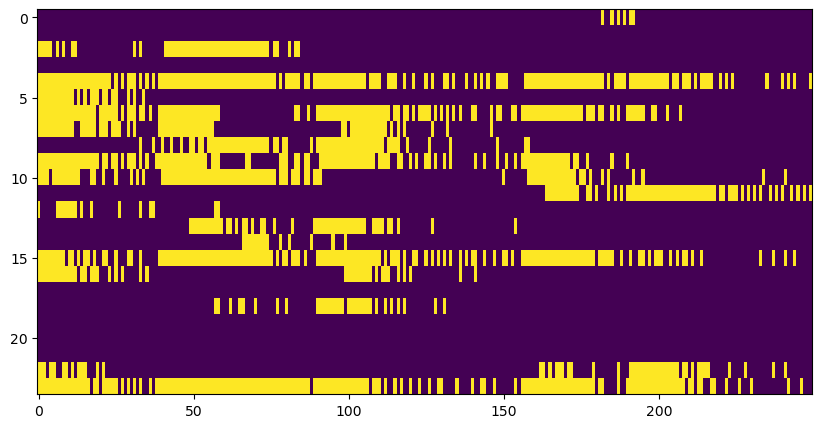

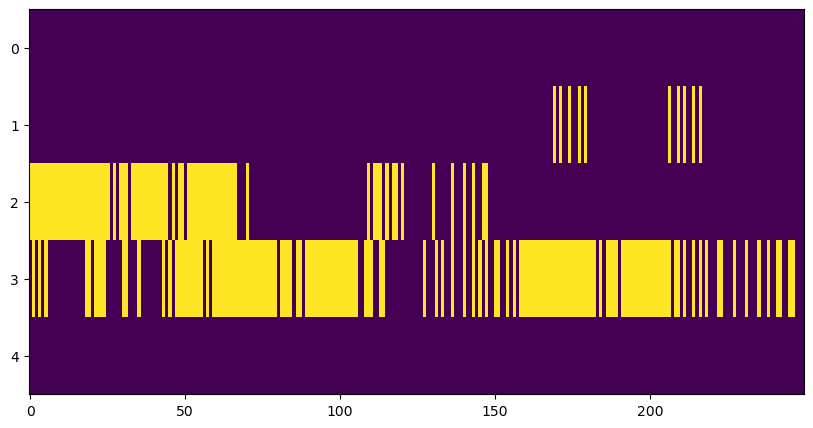

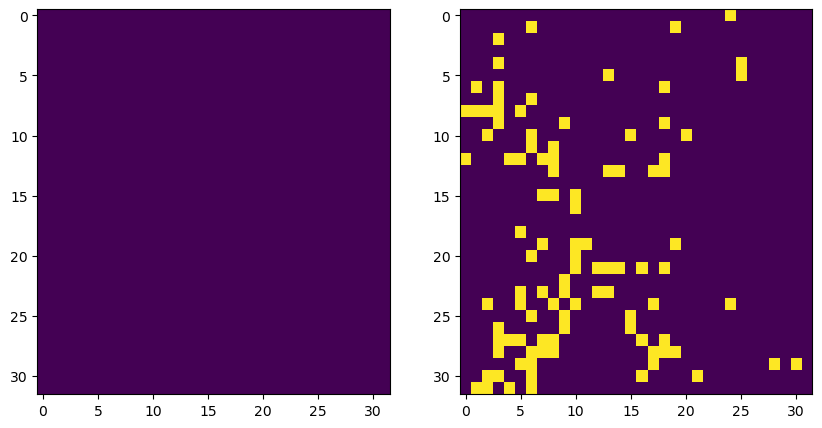

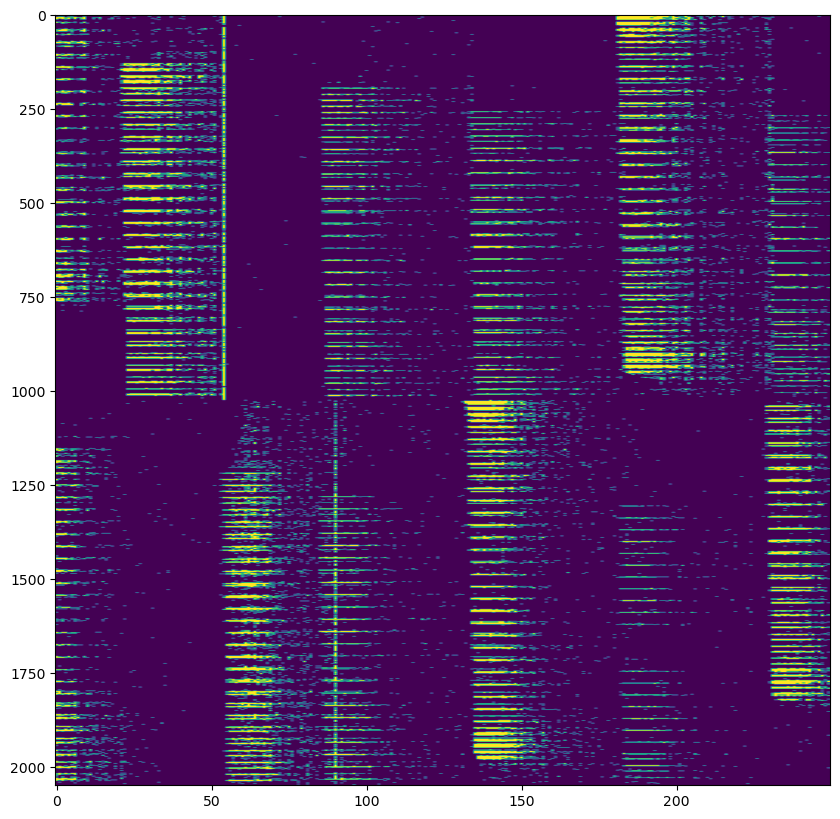

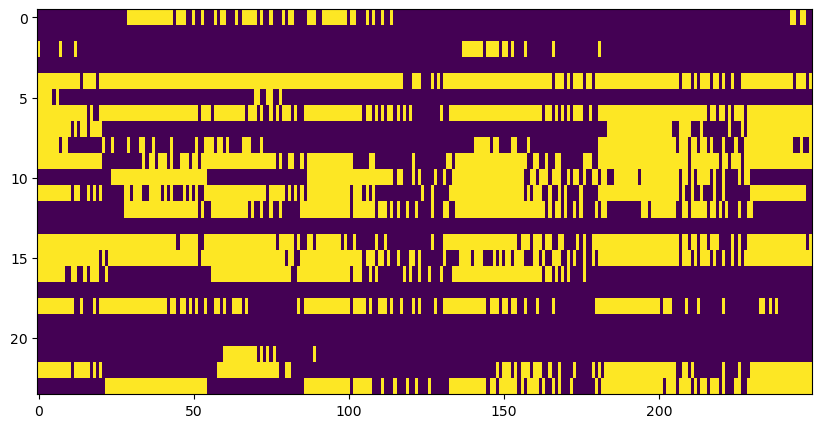

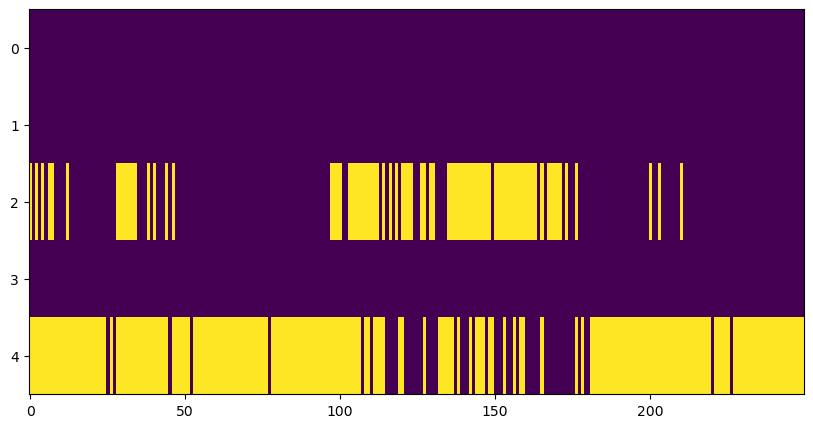

In [21]:
import matplotlib.pyplot as plt
import numpy as np
for x in range(batch_size):

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(i_spikes[75, x, :32*32].reshape(32, 32), aspect='auto')
    plt.subplot(122)
    plt.imshow(i_spikes[75, x, 32*32:].reshape(32, 32), aspect='auto')

    plt.figure(figsize=(10, 10))
    plt.imshow(i_spikes[:, x, :].T, aspect='auto')

    plt.figure(figsize=(10, 5))
    plt.imshow(l1_spikes[:, x, :].T, aspect='auto')

    plt.figure(figsize=(10, 5))
    plt.imshow(o_spikes[:, x, :].T, aspect='auto')

    np.save(f'i_spikes_{x}.npy', i_spikes[:, x, :].T)

In [ ]:
import numpy as np
np.save('i_spikes_B.npy', i_spikes[:, 0, :].T)
